# Human Resources Retention 
<hr>

Build machine learning models to predict employee retention that could save a company hundreds of thousands of dollars.

## Background and Business Problem

Hiring and retaining top talent are extremely challenging task that requires capital time and skills. According to [Toggl Hire](https://toggl.com/blog/cost-of-hiring-an-employee), small business owners spend 40% of their working hours on tasks that do not generate any income, such us hiring. Moreover, companies spend 15 - 20% of the employee's salary to recruit a new candidate, which is a massive amount, especially for large companies with thousand of employees. 

Imagine you have been hired as a Data Scientist to improve the human resources department using data science. The HR department has collected extensive data on their employees and approach you to develop a model that could predict which employees are more likely to quit. By developing accurate prediction models that could predict employee retention, you could potentially save the company hundreds of thousands of dollars. 

Some questions needed to be answered are:
- Why do employees want to leave or stay?
- How can we make them motivated?
- What is the cost associated with basically employees leaving the company?

In [1]:
# import all the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

# Display all the columns in pandas without being truncated
pd.options.display.max_columns = None


Bad key text.latex.unicode in file C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
h

## Load the Dataset

In [2]:
employee_df = pd.read_csv('Datasets/Human_Resources.csv')
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [3]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Some insight we can observe at first glance:
- The data has 1470 rows with 35 features, that is tons of information. 
- we can guess that perhaps the older employess (> 40 years old) are most likely comfortable with the job.
- `Attrition` is the column that we try to predict.
- `DailyRate` is how much money each employee generates.
- `MaritalStatus`, perhaps for single people are most likely to leave?
- `StockOptionSalary`. On top of your salary, the company gives you additional stock options or additional stocks. Hence, if the employees are working hard, and the company does well, most likely their stock will do well as well.
- Most features are self-explanatory.

In [4]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<hr>

# Data Analysis and Visualization

- Before we do any visualization, let's convert some columns with object/string data type, like 'Yes' or 'No'

In [6]:
ynCol = ['Attrition', 'OverTime', 'Over18']
for col in ynCol:
    print('col: ', col)
    print(employee_df[col].value_counts())
    print()

col:  Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

col:  OverTime
No     1054
Yes     416
Name: OverTime, dtype: int64

col:  Over18
Y    1470
Name: Over18, dtype: int64



In [7]:
# Let's replace 'Attrition', 'Overtime', 'Over18', columns with integers before performing any visualizaations
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x=='Y' else 0)

In [8]:
employee_df[ynCol].head()

,Attrition,OverTime,Over18
0,1,1,1
1,0,0,1
2,1,1,1
3,0,1,1
4,0,0,1


- To detect any missing value, we can use `.isnull()`, combined with seaborn heat map.

In [9]:
employee_df['Attrition'].isnull().value_counts()

False    1470
Name: Attrition, dtype: int64

<AxesSubplot:>

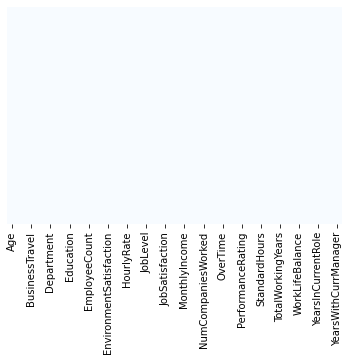

In [10]:
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

## Histogram

As we can see, we don't have any missing data based on the heat map. If we do have, a different color will appear indicating that we have one.

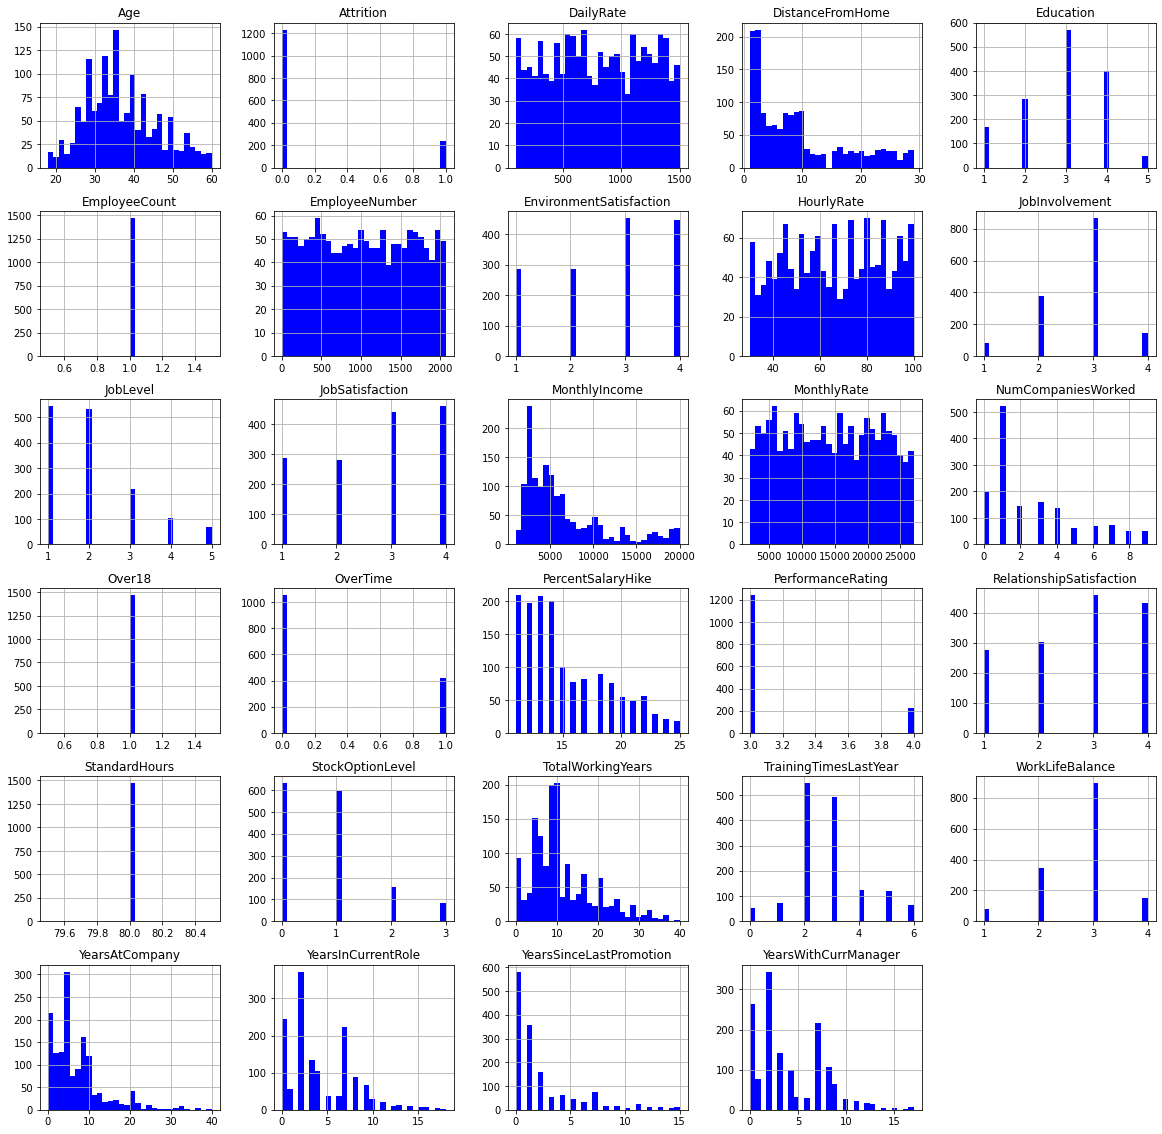

In [11]:
employee_df.hist(bins = 30, figsize=(20,20), color = 'b')
plt.show()

## Quick Insights
1. In the `Age` distribution, a lot of people are 30 and 40 years old.
2. In the `Attrition`, many employees are keen to stay (more than 1200 of 1470). For the employees who want to leave, we can inspect more, are they younger crowd? are they single or married? Are they happy with their job? Are they paid well? 
3. In the `DistanceFromHome` from home, lots of employee live close to work.
4. In the `Education`, the majority is in level 3, which is undergraduate degree.
5. In the `MonthlyIncome`, a lot of employees are getting paid < USD 5000. Then, as you move forward, it's  actually a lot less.
6. In the `PercentSalaryHike`, a lot of employees got < 15%, and very small got 25%, which makes sense. 
7. In the `TotalWorkingYears`, most of the employees have between 0 and 10 years.

## Drop Some Data

From our quick observation, we can see some information that does not change from one employee to the other, such as:
- `EmployeeCount`
- `EmployeeNumber`
- `StandardHours`
- `Over18`

We can drop these columns!

In [12]:
employee_df.drop( labels=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace = True)

In [13]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


## Left vs Stayed Employees

In [14]:
# Let's see how many employees left the company
left_df = employee_df[employee_df.Attrition == 1].reset_index(drop=True)
stayed_df = employee_df[employee_df.Attrition == 0].reset_index(drop=True)

In [15]:
# Count the number of employees who stayed and left
print('Total : ', len( employee_df))
print('The number of employees who left: ', len( left_df))
print('% of employees who left: {:.2f}%'.format(100*len( left_df)/len( employee_df), '%'))

print('The number of employees who stayed: ', len( stayed_df))
print('% of employees who stayed: {:.2f}%'.format(100*len( stayed_df)/len( employee_df), '%'))

Total :  1470
The number of employees who left:  237
% of employees who left: 16.12%
The number of employees who stayed:  1233
% of employees who stayed: 83.88%


Compare the mean and standard deviation of the employees who stayed and left

In [16]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


__Quick Insights__:
1. `age`: The mean of age of the employees who stayed is higher compared to who left.
2. `DailyRate`: The daily rate of employees who stayed is also higher.
3. `DistanceFromHome`: Employees who stayed live closer to home.
4. `EnvironmentSatisfaction	` & `JobSatisfaction`: Employees who stayed are generally more satisfied with their job.
5. `StockOptionLevel`: Employees who stayed tend to have higher stock option level.:

## Correlations: Heat Map

- Correlation is __relationship between variables__. By looking at correlations, we can see how strong the relationship is, and what type of relationships exist between our variables, basically more about the directions. 


- By looking whether or not a correlation has a positive or negative sign, we can tell what is happening between the variables. 


- If needed, we can also take a look at the graph of a correlation and quickly see what direction our correlation is in. 

__The strength of a correlation__
- +- .8 or higher --> strong correlation
- +- .5 - .8 --> medium correlation
- +- 0.5 or lower --> weak correlation

__Note__: We cannot infer the causality or say that one variable is affecting / impacting the other.
- For example, we can draw a line (regression) to indicate the direction and the relationship between two variables. 
- However, if the datapoints are increasing and close to each other, then we can say the variables are __strongly correlated__.
- However, if the datapoints are increasing but not close to each other, although the line drawn are quite the same in the gradient, we can say that the variables are __weakly correlated__.

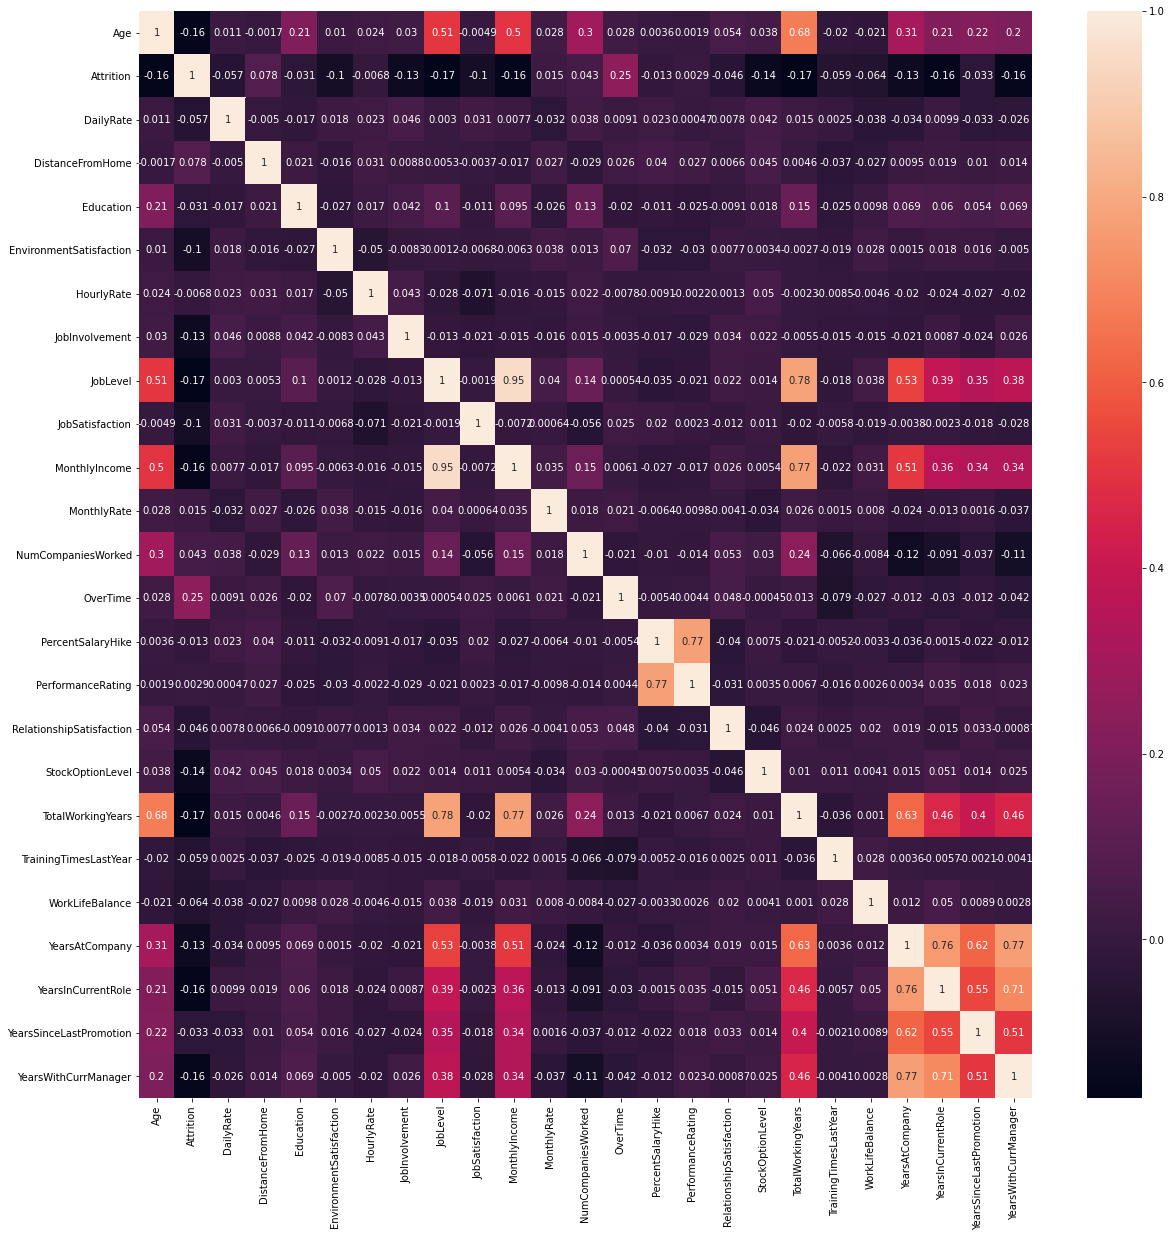

In [18]:
correlations = employee_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True)

plt.show()

Using a heatmap, we can see the correlation between one feature to another. From the color map on the right hand side, the lighter the color, the more positively correlated. The new insights we can get based on the heatmap are as follows:
- There are strong correlation between the `TotalWorkingYears` with the `JobLevel`. This insight makes sense since the more employees tend to stay at the company, they tend to have a higher job level.
- Monthly income is strongly correlated with Job level.
- Monthly income is also strongly correlated with total working years.
- Age is strongly correlated with monthly income.

## Count Plot
__Definition__: A count plot can be thought of as a histogram across a categorical, instead of a quantitative, variable. In other words, it shows the counts of observations in each categorical bin using bars. 

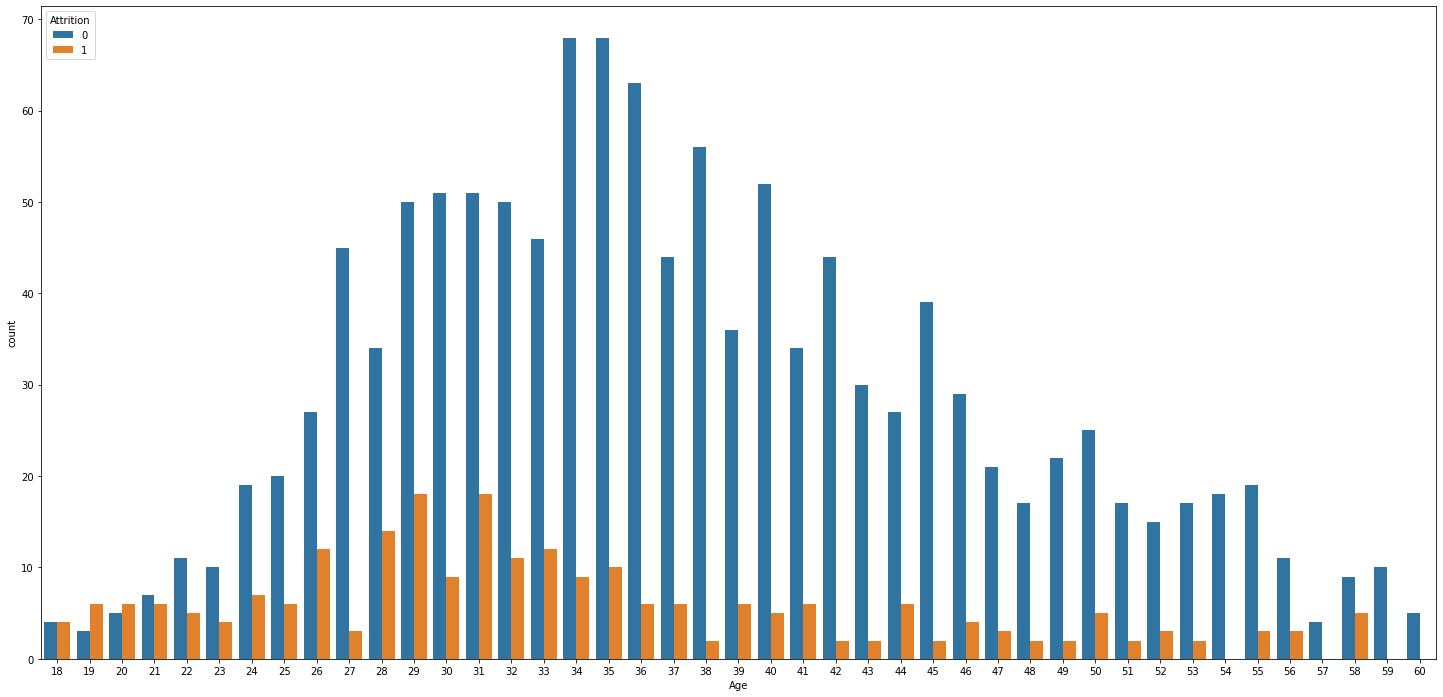

In [23]:
plt.figure( figsize=(25,12))
sns.countplot( x="Age", hue='Attrition', data=employee_df)
plt.show()

From here, we can inspect that for the employees around the age 28 - 31, a lot of them actually left the company. For example, in the age of 29, we have around 70 employess, where 50 of them stayed, and the remaining 20 left. 

This sparks our curiosity, why so many people around that age want to move to another company. Is it because they want to have more money, or live closer to home and start a family? Hence, these are important aspects to look at.

As the employees grow older, many of them want to stay, and that totally makes sense. For example, in the age of 54, no body want to leave the company. 

In other words, we can say that Age could be a factor that determines whether or not an employee want to stay at the company. 

In [24]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

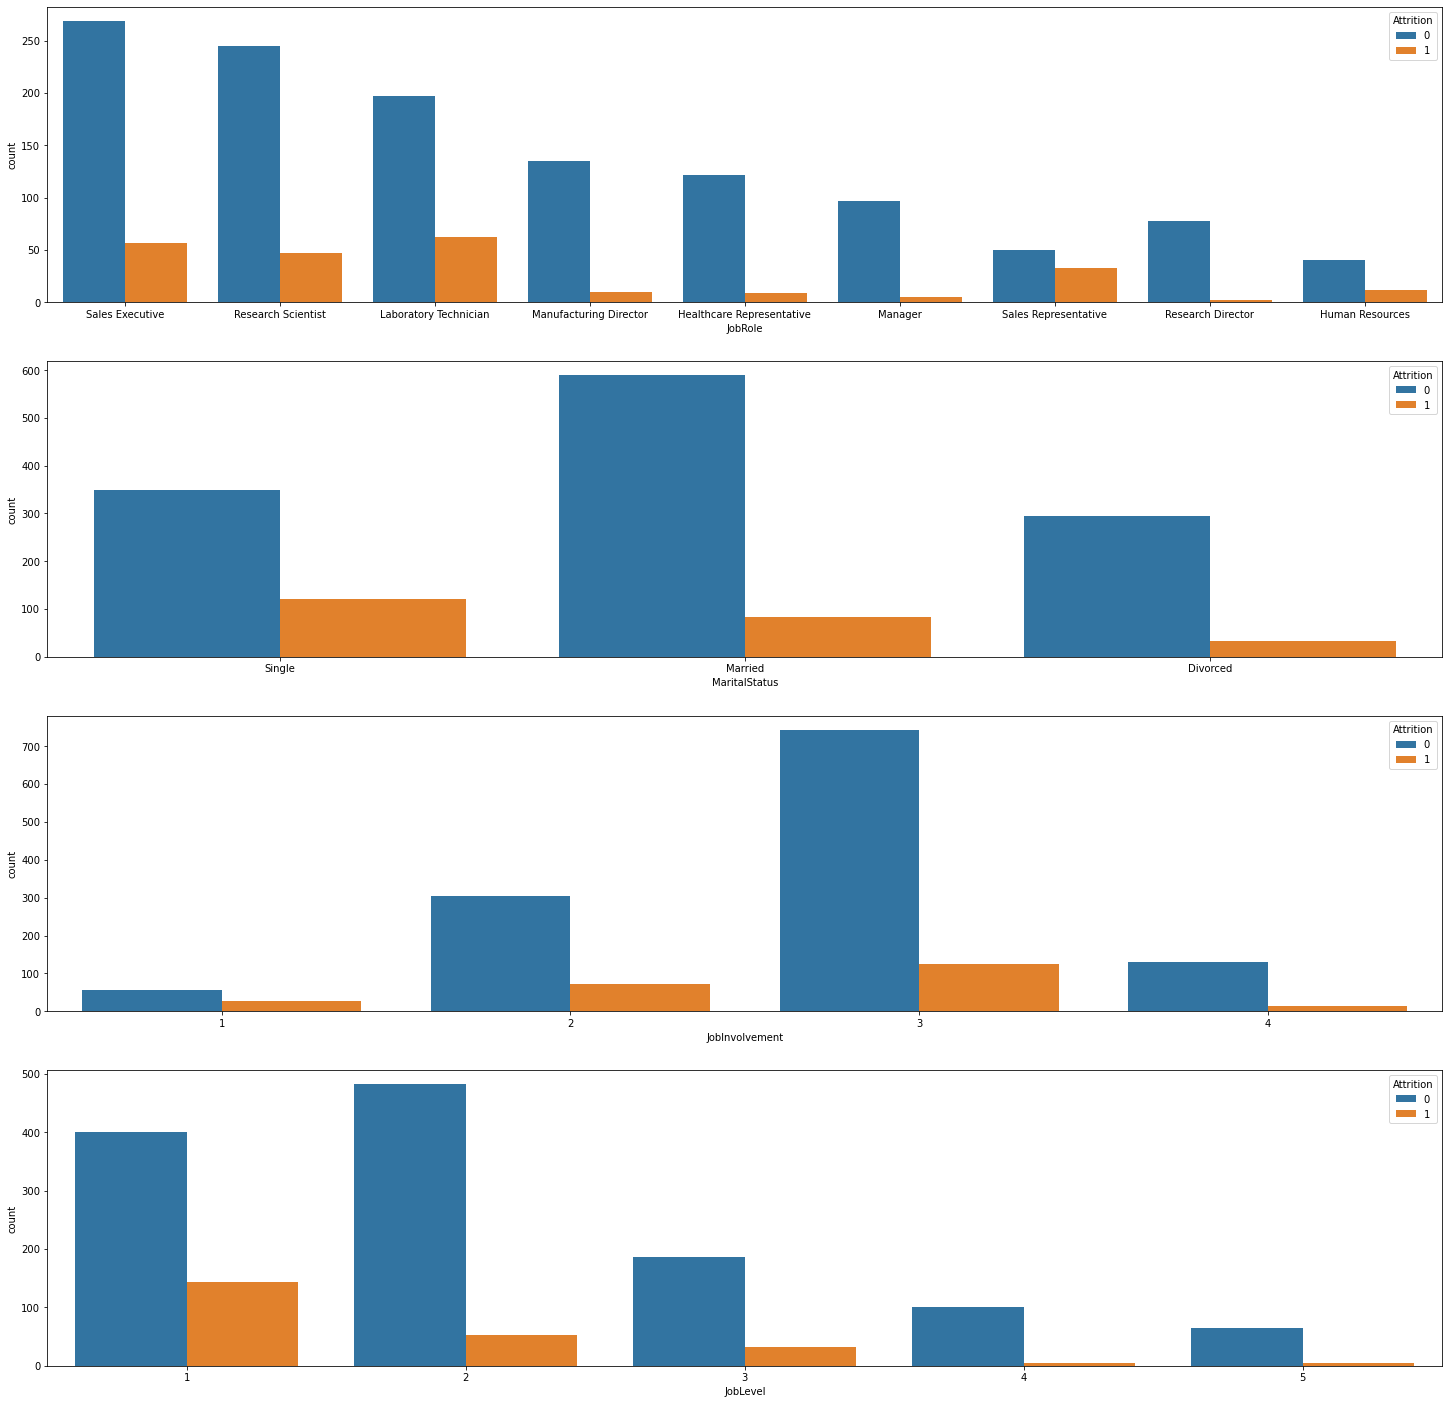

In [25]:
# Set the figure size
plt.figure(figsize=(25, 25))

# Set each count plot to be inside a sub figure
plt.subplot(4, 1, 1)
sns.countplot( x= 'JobRole', hue='Attrition', data=employee_df)

plt.subplot(4, 1, 2)
sns.countplot( x= 'MaritalStatus', hue='Attrition', data=employee_df)

plt.subplot(4, 1, 3)
sns.countplot( x= 'JobInvolvement', hue='Attrition', data=employee_df)

plt.subplot(4, 1, 4)
sns.countplot( x= 'JobLevel', hue='Attrition', data=employee_df)

plt.show()

- In the `JobRole`, Sales Representative tends to leave the job. Almost half of the employees don't stay at the company compared to other jobs. However, for Research Director, almost nobody leave the company. Maybe they are getting paid well, we can explore that.
- In the `MaritalStatus`, it seems that Single employees tend to leave the job, where we have around 350 who stayed, and 100 left. That's a lot of percentage compared to other marital status like Married or Divorced. 
- Now, in the `JobInvolvement`, employees who were not involved at all actually left. We compare the percentage wise here. Hence, with low job involvement, they tend to leave the company. 
- In the `JobLevel`, the more you become experienced, it's very unlikely that you will leave the company. However, if you are starting out, exploring, obviously you might have a tendency to leave the company. 

## Kernel Density Estimate (KDE)

KDE is used for visualizing the Probabililty Density of a continuous variables. KDE describes the probability density at different values in a continuous variable. 

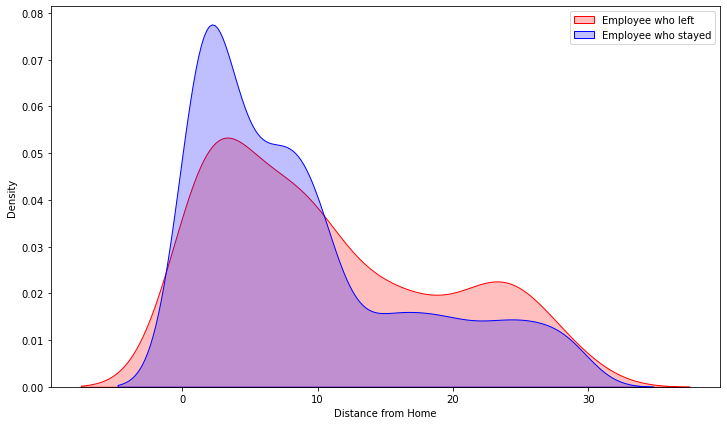

In [47]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label='Employee who left', shade=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employee who stayed', shade=True, color='b')
plt.xlabel("Distance from Home")
plt.legend()
plt.show()

We can inspect as the distance goes up, the number of employees who tends to leave (the red) is higher than the employees who stayed (the blue). Perhaps the distance has some correlation with the number of employees who stayed or left.

In [45]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

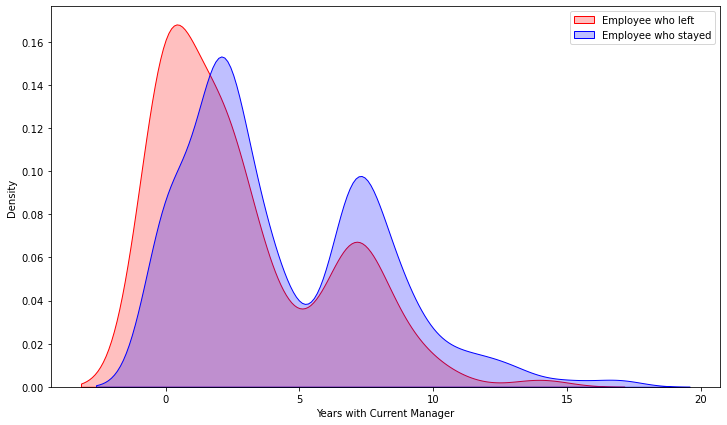

In [48]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label='Employee who left', shade=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employee who stayed', shade=True, color='b')
plt.xlabel("Years with Current Manager")
plt.legend()
plt.show()

In general, it seems that if we have the small number of years with the current manager, the employees tend to leave more. However, as we increase the number of years beyond 5 years, the blue tends to higher than the red, indicating the majority of employees tend to stay at the company.

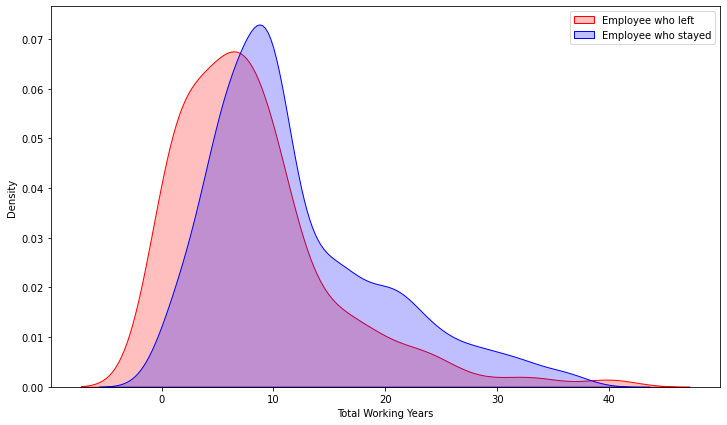

In [50]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label='Employee who left', shade=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Employee who stayed', shade=True, color='b')
plt.xlabel("Total Working Years")
plt.legend()
plt.show()

It seems that for the total working years between 0 - 7 years, the employees tend to leave more. However, as you go beyond that, the blue graph supersedes, which means the employees tend to stay as we increase the total working years.

## Box Plot

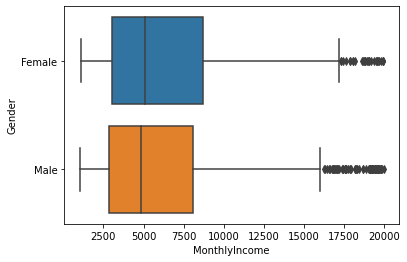

In [62]:
sns.boxplot( x='MonthlyIncome', y='Gender', data=employee_df)
plt.show()

It seems that the average between the male and female is quite comparable. That's very important in gender equality. 

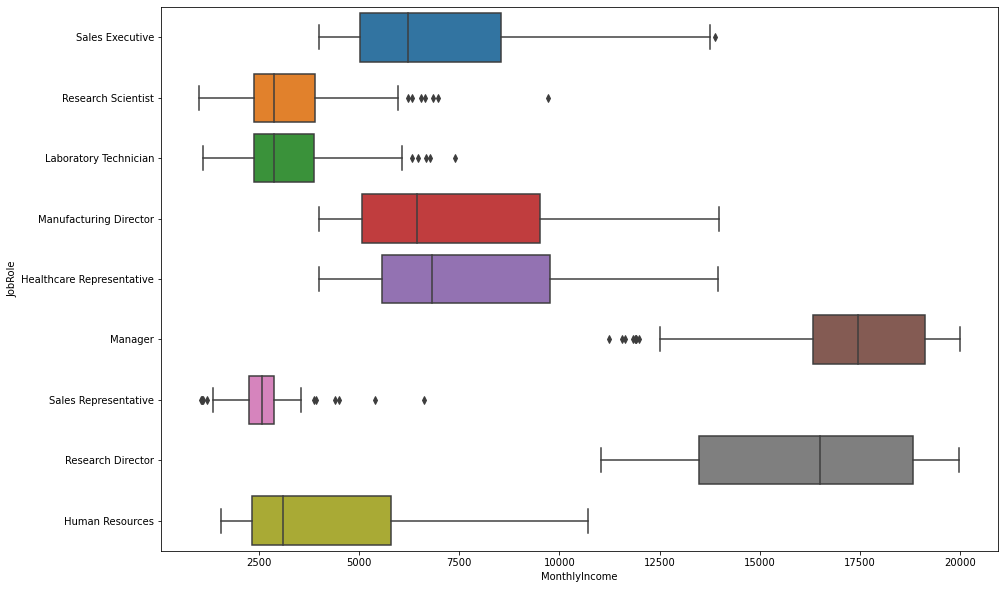

In [64]:
plt.figure(figsize=(15,10))
sns.boxplot( x='MonthlyIncome', y='JobRole', data=employee_df)
plt.show()

The employees who work as manager tend to get a lot more, around $ 17.5K in average, followed by research director. On the other hand, research scientist and lab techniciant are paid not that much and quite the same. At last, sales representative is also paid less compared to other job roles. 